In [13]:
import os
import sys
import pathlib

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
from utils.processImage import get_subimage, process_image, plot_subimages, stitch_subimages
from utils.solver import sudoku, solve_sudoku
import cv2 as cv

TEST_IMAGES = pathlib.Path.cwd().parent.joinpath("test_images")

## Solving a Sudoku given a numpy array

In [14]:
input_array = np.array(
[[2, 0, 6, 5, 0, 0, 4, 1, 9],
 [9, 0, 5, 0, 0, 2, 0, 0, 8],
 [0, 0, 0, 3, 9, 4, 6, 0, 5],
 [0, 5, 7, 4, 0, 0, 0, 6, 0],
 [0, 1, 0, 9, 0, 8, 0, 4, 0],
 [4, 0, 0, 0, 5, 0, 3, 8, 0],
 [1, 7, 4, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 6, 7, 9, 0, 0, 0],
 [0, 0, 9, 0, 4, 1, 8, 0, 3]])

s = sudoku(input_array)
s

[[2 0 6 5 0 0 4 1 9]
 [9 0 5 0 0 2 0 0 8]
 [0 0 0 3 9 4 6 0 5]
 [0 5 7 4 0 0 0 6 0]
 [0 1 0 9 0 8 0 4 0]
 [4 0 0 0 5 0 3 8 0]
 [1 7 4 0 0 0 0 0 0]
 [0 0 0 6 7 9 0 0 0]
 [0 0 9 0 4 1 8 0 3]]

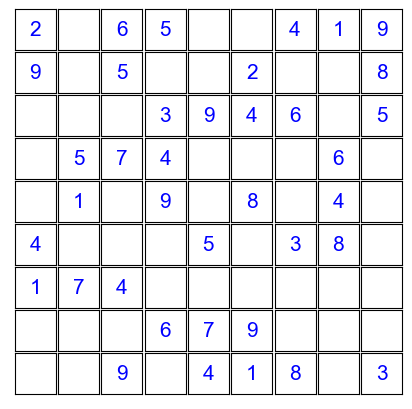

In [15]:
s.plot()

solved in 5 turns


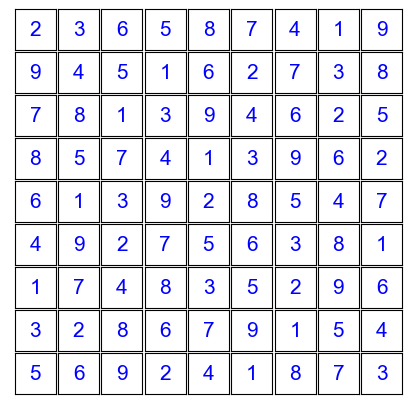

In [16]:
solve_sudoku(s)

##  Reading the Sudoku from a good quality top-down image of a Sudoku

In [17]:
fp=TEST_IMAGES.joinpath("sudoku_test.png")

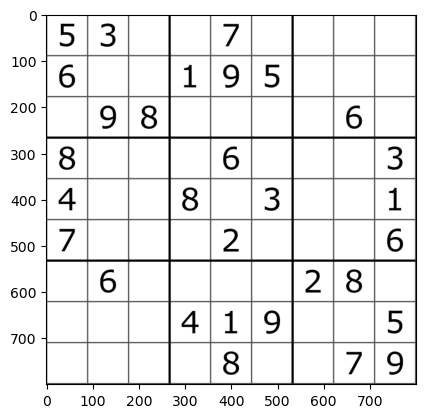

In [18]:
image = imread(fp)
image = rgb2gray(image[:,:,:3])

image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
image = (image - image.min())/(image.max()-image.min())

plt.imshow(image, cmap='gray')
plt.show()

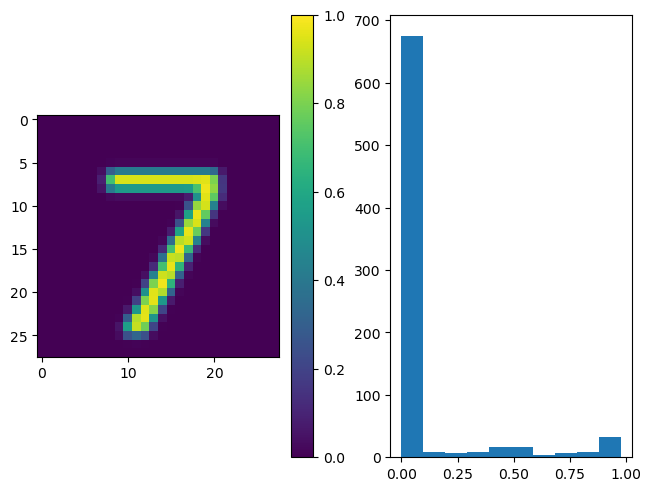

0.18012136931439582
False


In [19]:
im = get_subimage(image, 5,0)
fig, (ax_im, ax_hist) = plt.subplots(1,2, constrained_layout = True)
_im = ax_im.imshow(im, cmap = 'viridis', vmin=0, vmax=1)
plt.colorbar(_im)
ax_hist.hist(im.ravel())
plt.show()

print(im[7:14,7:14].mean())

print((im==1).all())

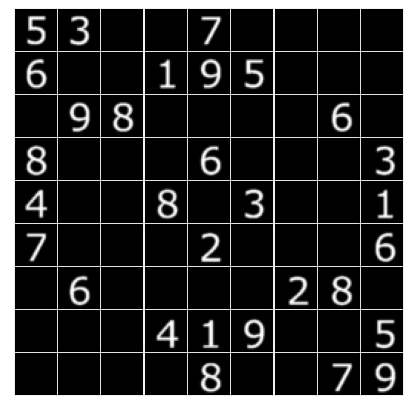

In [20]:
plot_subimages(image)

In [21]:
# from skimage import transform
# transformed_image = transform.resize(image,(540,540),anti_aliasing=False)
# stitched, x = stitch_subimages(transformed_image)
# fig, ax = plt.subplots(figsize=(10,1))
# _i=ax.imshow(1-stitched, cmap='gray')
# plt.axis('off')
# plt.savefig(TEST_IMAGES.joinpath("stitched.jpg"))
# plt.show()

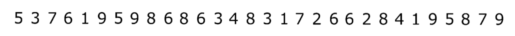

5 3 761 959 868 6 34 83 17266 2 8 4 1 95879
537619598686348317266284195879


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

In [22]:
s=process_image(fp)
s

solved in 10 turns


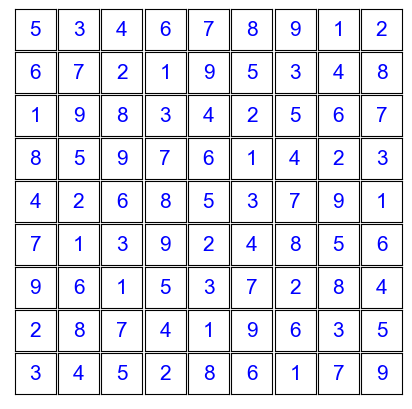

In [23]:
solve_sudoku(s)

## Example 2: From unwarped image



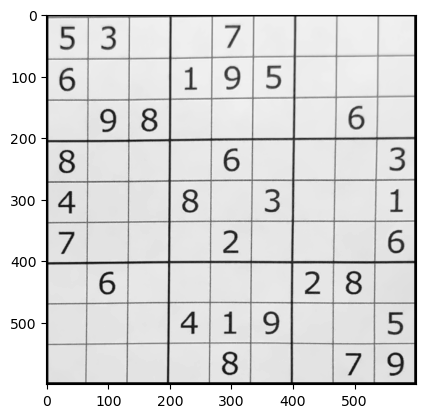

In [24]:
fp=TEST_IMAGES.joinpath("sudoku_wiki_unwarped.png")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
image = (image - image.min())/(image.max()-image.min())

fig, ax = plt.subplots()
ax.imshow(image, 'gray')
plt.show()


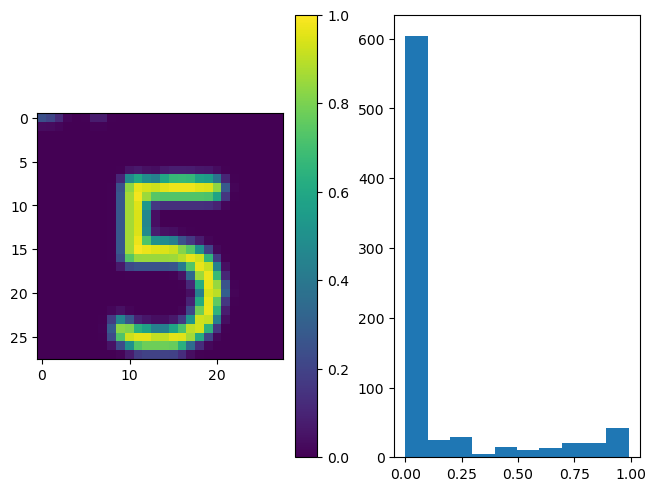

In [25]:
im = get_subimage(image, 0,0)
fig, (ax_im, ax_hist) = plt.subplots(1,2, constrained_layout = True)
_im = ax_im.imshow(im, cmap = 'viridis', vmin=0, vmax=1)
plt.colorbar(_im)
ax_hist.hist(im.ravel())
plt.show()

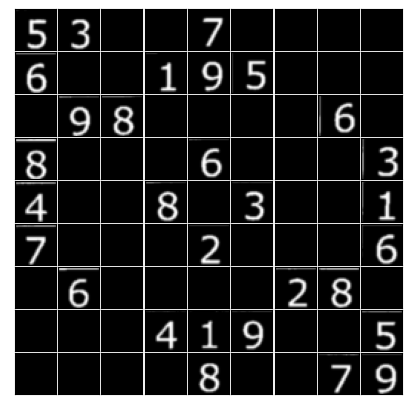

In [26]:
plot_subimages(image)

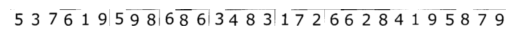

53 76 1 959 8 68 634 8 3 17 2 66 2 84 195 8 79
537619598686348317266284195879


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

In [27]:
s=process_image(fp)
s

solved in 10 turns


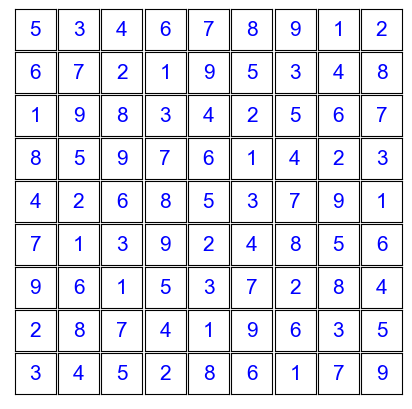

In [28]:
solve_sudoku(s)